<a href="https://colab.research.google.com/github/Kamrul732/dataScience/blob/cluster/clusteri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Classroom/DataScience/mall customers.csv')
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.shape

(200, 5)

In [5]:
data.drop(['CustomerID','Gender'] , axis = 1, inplace = True)
data.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [6]:
data.rename(columns={'Age' :  'age', 'Annual Income (k$)'  : 'income', 'Spending Score (1-100)' : 'score'}, inplace=True)
data.head()

,age,income,score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


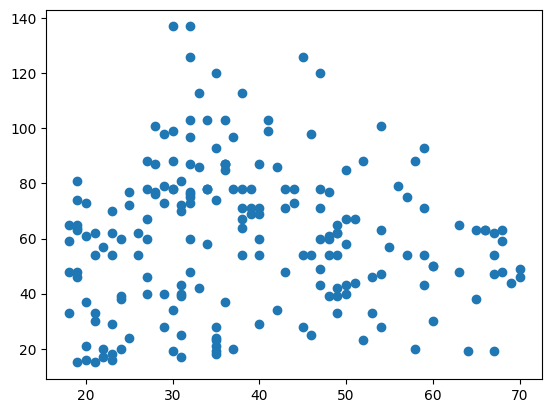

In [7]:
import matplotlib.pyplot as plt
plt.scatter(data.age, data.income)



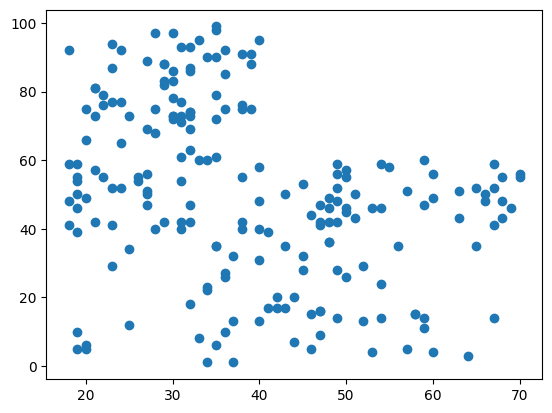

In [8]:
plt.scatter(data.age, data.score)

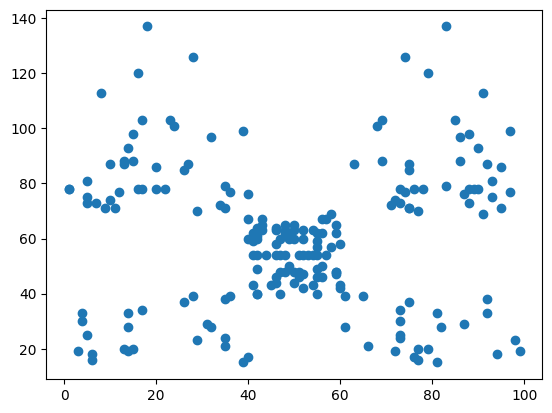

In [9]:
plt.scatter(data.score, data.income)

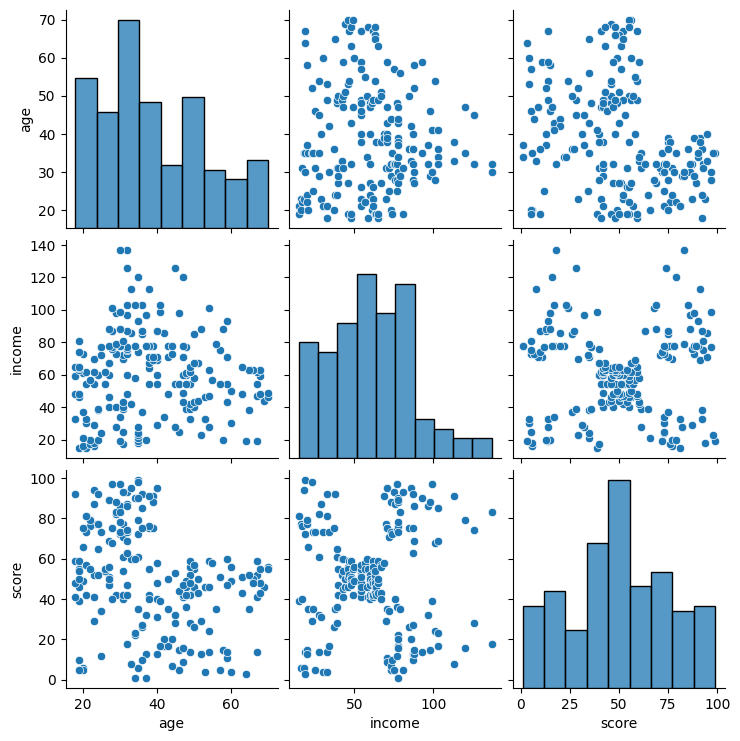

In [10]:
import seaborn as sns
sns.pairplot(data[['age', 'income', 'score']])
plt.savefig('image.png')

Text(0, 0.5, 'income in $1000')

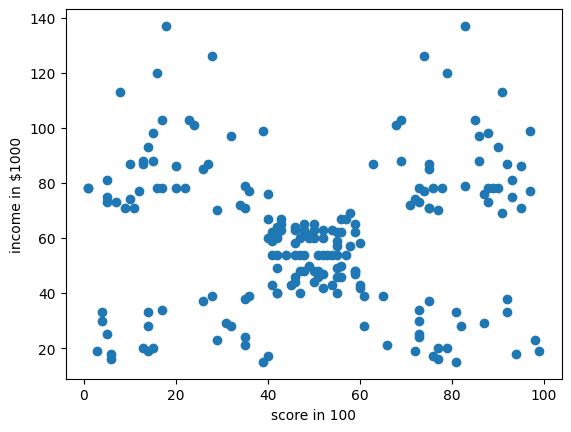

In [11]:
plt.scatter(data.score, data.income)
plt.xlabel('score in 100')
plt.ylabel('income in $1000')

In [12]:
from sklearn.cluster import KMeans
km = KMeans()

In [13]:
x = data[['score','income']]
x.head()

,score,income
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


In [14]:
km.fit((data[['score', 'income']]))

KMeans()

In [15]:
data['defcluster']= km.fit_predict((data[['score', 'income']]))

In [16]:
km.predict(data[['score','income']])

array([4, 3, 5, 3, 4, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 4, 3, 4, 3, 4, 3,
       5, 3, 5, 3, 4, 3, 4, 3, 5, 3, 5, 3, 5, 3, 5, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 6, 6, 1, 1, 1, 1,
       1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 0, 6, 0, 2, 0, 2, 0,
       6, 0, 2, 0, 2, 0, 2, 0, 2, 0, 6, 0, 2, 0, 6, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 6, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 7, 0, 7, 0, 7, 0,
       7, 0], dtype=int32)

In [17]:
data.head()

,age,income,score,defcluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,5
3,23,16,77,3
4,31,17,40,4


In [18]:
data0 = data[data.defcluster == 0]
data1 = data[data.defcluster == 1]
data2 = data[data.defcluster == 2]
data3 = data[data.defcluster == 3]
data4 = data[data.defcluster == 4]
data5 = data[data.defcluster == 5]
data6 = data[data.defcluster == 6]
data7 = data[data.defcluster == 7]

In [19]:
data0.shape

(39, 4)

Text(0, 0.5, 'income in $1000')

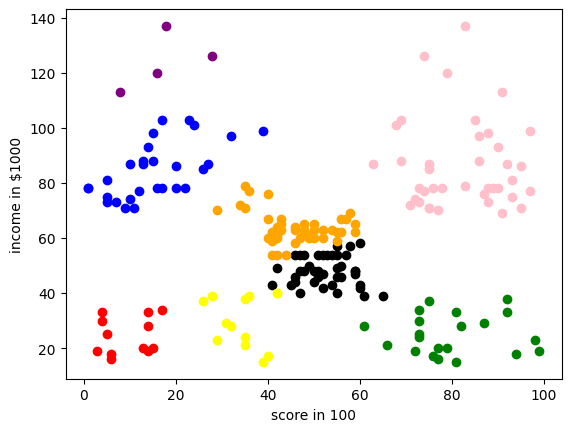

In [20]:
plt.scatter(data0.score, data0.income , color = 'pink', label = 'cluster 0')
plt.scatter(data1.score, data1.income , color = 'black', label = 'cluster 1')
plt.scatter(data2.score, data2.income , color = 'blue', label = 'cluster 2')
plt.scatter(data3.score, data3.income , color = 'green', label = 'cluster 3')
plt.scatter(data4.score, data4.income , color = 'yellow', label = 'cluster 4')
plt.scatter(data5.score, data5.income , color = 'red', label = 'cluster 5')
plt.scatter(data6.score, data6.income , color = 'orange', label = 'cluster 6')
plt.scatter(data7.score, data7.income , color = 'purple', label = 'cluster 7')
plt.xlabel('score in 100')
plt.ylabel('income in $1000')


In [23]:
#objective function
wccs  = []
cluster = range(1,15)
for k in cluster:
    clst = KMeans(n_clusters = k)
    clst.fit(data[['score', 'income']])
    wccs.append(clst.inertia_)

In [25]:
wccs

[269981.28000000014,
 183653.3289473683,
 106348.37306211119,
 73880.64496247198,
 44454.47647967972,
 37442.24745037571,
 30273.394312070028,
 30059.6876536299,
 23243.14807479342,
 22128.532177033492,
 18160.547769166315,
 16301.295945518339,
 15582.852406693906,
 13554.364244892537]

Text(0, 0.5, 'wcss')

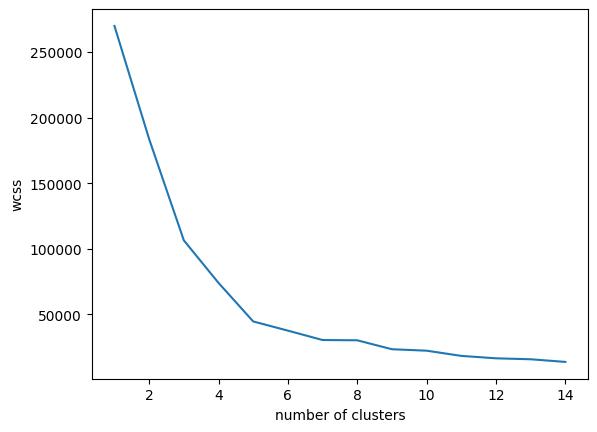

In [26]:
plt.plot(range(1, 15), wccs)
plt.xlabel('number of clusters')
plt.ylabel('wcss')

In [31]:
!pip install kneed

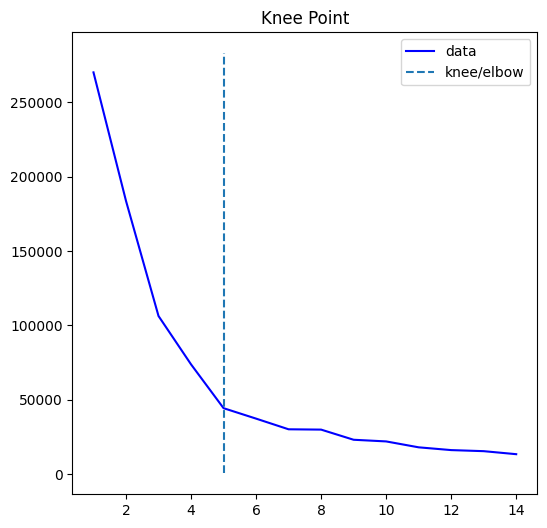

In [32]:
from kneed import KneeLocator as kn
kl = kn(cluster, wccs, direction = 'decreasing', curve = 'convex')
kl.plot_knee()

After optimizing KmeansCluster

In [34]:
km = KMeans(n_clusters = 5)
data['defcluster'] = km.fit_predict(data[['score', 'income']])

In [35]:
data.head()

,age,income,score,defcluster
0,19,15,39,0
1,21,15,81,4
2,20,16,6,0
3,23,16,77,4
4,31,17,40,0


In [36]:
cen = km.cluster_centers_

In [37]:
cen

array([[20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ],
       [17.11428571, 88.2       ],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273]])

In [38]:
data0 = data[data.defcluster == 0]
data1 = data[data.defcluster == 1]
data2 = data[data.defcluster == 2]
data3 = data[data.defcluster == 3]
data4 = data[data.defcluster == 4]

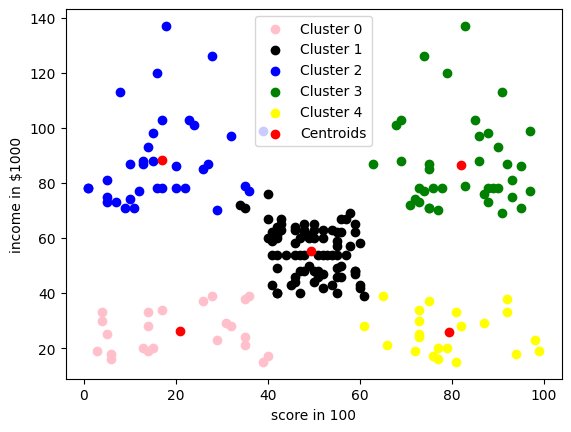

In [41]:

plt.scatter(data0.score, data0.income, color='pink', label='Cluster 0')
plt.scatter(data1.score, data1.income, color='black', label='Cluster 1')
plt.scatter(data2.score, data2.income, color='blue', label='Cluster 2')
plt.scatter(data3.score, data3.income, color='green', label='Cluster 3')
plt.scatter(data4.score, data4.income, color='yellow', label='Cluster 4')

plt.scatter(cen[:,0], cen[:,1], color='red', label='Centroids')

plt.xlabel('score in 100')
plt.ylabel('income in $1000')
plt.legend()